In [1]:
%load_ext autoreload
%autoreload 2
import torch
import numpy as np
import os
import random
import warnings
import json
from lib import *
from gnnboundary import *

warnings.filterwarnings('ignore')

In [2]:
seeds = [42, 43, 44, 45, 46]

# MRSC9

In [3]:
dataset_name="mrsc9"
dataset = MSRCDataset(seed=12345)
model = MultiGCNClassifier(node_features=len(dataset.NODE_CLS),
                             num_classes=len(dataset.GRAPH_CLS),
                             hidden_channels=16,
                             num_layers=5)
model.load_state_dict(torch.load('ckpts/msrc_9.pt'))
dataset_list_gt = dataset.split_by_class()
dataset_list_pred = dataset.split_by_pred(model)
mean_embeds = [d.model_transform(model, key="embeds").mean(dim=0) for d in dataset_list_gt]

Using existing file MSRC_9.zip
Extracting data/MSRC_9/raw/MSRC_9.zip


## adjacenct classes

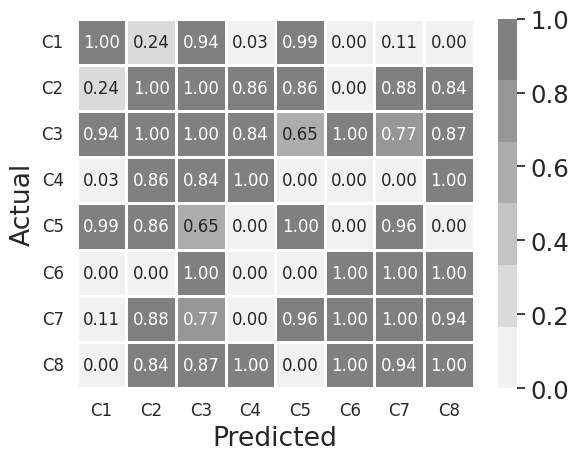

In [4]:
from lib.helpers import draw_matrix_colorless

adj_ratio_mat, boundary_info = pairwise_boundary_analysis(model, dataset_list_pred)
draw_matrix_colorless(adj_ratio_mat, names=dataset.GRAPH_CLS.values(), fmt='.2f', labelsize=12, annotsize=12)

In [7]:
adjacent_classes = extract_adjacent_classes(adj_ratio_mat, threshold=0.8)
print(adjacent_classes)
print(len(adjacent_classes))

adjacent_classes = adjacent_classes[0:6]

[[1, 4], [4, 6], [1, 7], [2, 3], [1, 2], [3, 7], [6, 7], [0, 2], [2, 7], [2, 5], [0, 4], [5, 6], [1, 6], [1, 3], [5, 7]]
15


## results

In [8]:
results = get_results_2way(model=model, adjacent_classes=adjacent_classes, dataset_name=dataset_name, seeds=seeds, show_progress=True)

using seed 42


Using existing file MSRC_9.zip
Extracting data/MSRC_9/raw/MSRC_9.zip


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 43


Using existing file MSRC_9.zip
Extracting data/MSRC_9/raw/MSRC_9.zip


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 44


Using existing file MSRC_9.zip
Extracting data/MSRC_9/raw/MSRC_9.zip
Processing...
Done!


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 45


Using existing file MSRC_9.zip
Extracting data/MSRC_9/raw/MSRC_9.zip
Processing...
Done!


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 46


Using existing file MSRC_9.zip
Extracting data/MSRC_9/raw/MSRC_9.zip
Processing...
Done!


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

In [11]:
results_formatted = dict()
for k, v in results.items():
    results_formatted[f"{k[0]},{k[1]}"] = v.tolist()

# saves results to file
with open(f"logs/{dataset_name}.json", 'w', encoding='utf-8') as f: 
    json.dump(results_formatted, f, ensure_ascii=False, indent=4)

# load results from file
with open(f"logs/{dataset_name}.json", 'r') as f:
    loaded = json.load(f)

results = dict()
for k,v in loaded.items():
    results[(k[0],k[2])] = np.array(v)

In [14]:
for k, v in results.items():
    print(f"c1 = {k[0]} c2 = {k[1]}")
    print(f'gnnboundary: c1_mean = {v[0]} c1_std = {v[1]} c2_mean = {v[2]} c2_std = {v[3]}')
    print(f'baseline: c1_mean = {v[4]} c1_std = {v[5]} c2_mean = {v[6]} c2_std = {v[7]}')

c1 = 4 c2 = 6
gnnboundary: c1_mean = 0.49733915002018914 c1_std = 0.082835084118872 c2_mean = 0.49955419733524326 c2_std = 0.08295924079570524
baseline: c1_mean = 5.931085866382651e-05 c1_std = 0.0009492294787424513 c2_mean = 0.16548685191982768 c2_std = 0.3485848783201824
c1 = 3 c2 = 7
gnnboundary: c1_mean = 1.0 c1_std = 0.0 c2_mean = 3.410063458626235e-09 c2_std = 7.937786679653843e-10
baseline: c1_mean = 0.05617581496257077 c1_std = 0.20604425202262944 c2_mean = 0.645386768210663 c2_std = 0.43387760937629016
c1 = 1 c2 = 2
gnnboundary: c1_mean = 0.5015455972462892 c1_std = 0.08743965246086957 c2_mean = 0.47303566267415875 c2_std = 0.09429070786357793
baseline: c1_mean = 0.013854530094440341 c1_std = 0.09393760630329834 c2_mean = 0.036775477381892754 c2_std = 0.15965236742865066
c1 = 6 c2 = 7
gnnboundary: c1_mean = 0.46994919197315177 c1_std = 0.14552568975270316 c2_mean = 0.4833744026148692 c2_std = 0.1267718509352996
baseline: c1_mean = 0.16457004813758938 c1_std = 0.343701052435776

## 3way adjacent classes

In [4]:
adj_tensor, results = triplet_boundary_analysis(model, dataset_list_pred)
adjacent_triplets = find_top_triplets(adj_tensor, threshold=0.9)

Classes (5, 6, 7): Score 1.000 Classes (0, 2, 4): Score 0.980 Classes (1, 2, 3): Score 0.970 Classes (1, 2, 6): Score 0.940 Classes (2, 5, 7): Score 0.930 Classes (1, 2, 7): Score 0.920 Classes (3, 5, 7): Score 0.920


In [6]:
adjacent_triplets_list = []
for triplet in adjacent_triplets:
    adjacent_triplets_list.append(list(triplet["classes"])) 

print(adjacent_triplets_list)

adjacent_triplets_list = [[1,2,3], [1,2,7]]

[[5, 6, 7], [0, 2, 4], [1, 2, 3], [1, 2, 6], [2, 5, 7], [1, 2, 7], [3, 5, 7]]


## 3way results

In [7]:
results_3way = get_results_3way(model=model, adjacent_classes=adjacent_triplets_list, dataset_name=dataset_name, seeds=seeds, show_progress=True)

using seed 42


Using existing file MSRC_9.zip
Extracting data/MSRC_9/raw/MSRC_9.zip


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 43


Using existing file MSRC_9.zip
Extracting data/MSRC_9/raw/MSRC_9.zip


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 44


Using existing file MSRC_9.zip
Extracting data/MSRC_9/raw/MSRC_9.zip


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 45


Using existing file MSRC_9.zip
Extracting data/MSRC_9/raw/MSRC_9.zip


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 46


Using existing file MSRC_9.zip
Extracting data/MSRC_9/raw/MSRC_9.zip


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

In [9]:
results_3way_formatted = dict()
for k, v in results_3way.items():
    results_3way_formatted[f"{k[0]},{k[1]},{k[2]}"] = v.tolist()

# saves results to file
with open(f"logs/{dataset_name}_3way.json", 'w', encoding='utf-8') as f: 
    json.dump(results_3way_formatted, f, ensure_ascii=False, indent=4)

# load results from file
with open(f"logs/{dataset_name}_3way.json", 'r') as f:
    loaded_3way = json.load(f)

results_3way = dict()
for k,v in loaded_3way.items():
    results_3way[(k[0],k[2],k[4])] = np.array(v)

In [10]:
for k, v in results_3way.items():
    print(f"c1 = {k[0]} c2 = {k[1]} c3 = {k[2]}")
    print(f'gnnboundary: c1_mean = {v[0]} c1_std = {v[1]} c2_mean = {v[2]} c2_std = {v[3]} c3_mean = {v[4]} c3_std = {v[5]}')
    print(f'baseline: c1_mean = {v[6]} c1_std = {v[7]} c2_mean = {v[8]} c2_std = {v[9]} c3_mean = {v[10]} c3_std = {v[11]}')
    print(f"convergence rate = {v[12]}")

c1 = 5 c2 = 6 c3 = 7
gnnboundary: c1_mean = 0.36756072252467276 c1_std = 0.08231916304583241 c2_mean = 0.33302114897356366 c2_std = 0.09979059805902425 c3_mean = 0.29934373101927336 c3_std = 0.084837737760561
baseline: c1_mean = 0.08341822990330273 c1_std = 0.23625953116156323 c2_mean = 0.16637356873874246 c2_std = 0.3482955325084661 c3_mean = 0.6405488650402185 c3_std = 0.43877587409924346
convergence rate = 1.0
c1 = 0 c2 = 2 c3 = 4
gnnboundary: c1_mean = 0.19813641012832525 c1_std = 0.05680391144280142 c2_mean = 0.6135374412208795 c2_std = 0.027283794543641205 c3_mean = 0.1836404874846339 c3_std = 0.04857221867926496
baseline: c1_mean = 3.688301447411262e-15 c1_std = 7.306213194134544e-14 c2_mean = 0.03778544353650614 c2_std = 0.16610873222791767 c3_mean = 0.0006571905169028937 c3_std = 0.010475637583333662
convergence rate = 0.4
c1 = 3 c2 = 5 c3 = 7
gnnboundary: c1_mean = 0.32480050903484226 c1_std = 0.054472221332140476 c2_mean = 0.006226647393938038 c2_std = 0.002602316160069397 c

# Collab

In [3]:
dataset_name="collab"
dataset = CollabDataset(seed=12345)
model = GCNClassifier(node_features=len(dataset.NODE_CLS),
                      num_classes=len(dataset.GRAPH_CLS),
                      hidden_channels=64,
                      num_layers=5)
model.load_state_dict(torch.load('ckpts/collab.pt'))
dataset_list_gt = dataset.split_by_class()
dataset_list_pred = dataset.split_by_pred(model)
mean_embeds = [d.model_transform(model, key="embeds").mean(dim=0) for d in dataset_list_gt]

## adjacent classes

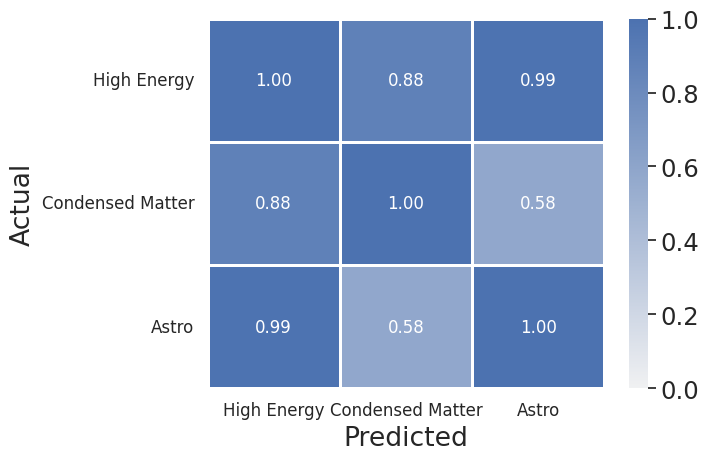

In [4]:
adj_ratio_mat, boundary_info = pairwise_boundary_analysis(model, dataset_list_pred)
draw_matrix(adj_ratio_mat, names=dataset.GRAPH_CLS.values(), fmt='.2f', labelsize=12, annotsize=12)

In [4]:
adjacent_classes = extract_adjacent_classes(adj_ratio_mat, threshold=0.8)
print(adjacent_classes)

# adjacent_classes = [[0,1], [0,2]]

## get results

In [5]:
results = get_results_2way(model=model, adjacent_classes=adjacent_classes, dataset_name=dataset_name, seeds=seeds, show_progress=True)

using seed 42


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 43


Processing...
Done!


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 44


Processing...
Done!


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 45


Processing...
Done!


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 46


Processing...
Done!


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

In [6]:
results_formatted = dict()
for k, v in results.items():
    results_formatted[f"{k[0]},{k[1]}"] = v.tolist()

# saves results to file
with open(f"logs/{dataset_name}.json", 'w', encoding='utf-8') as f: 
    json.dump(results_formatted, f, ensure_ascii=False, indent=4)

# load results from file
with open(f"logs/{dataset_name}.json", 'r') as f:
    loaded = json.load(f)

results = dict()
for k,v in loaded.items():
    results[(k[0],k[2])] = np.array(v)

In [7]:
for k, v in results.items():
    print(f"c1 = {k[0]} c2 = {k[1]}")
    print(f'gnnboundary: c1_mean = {v[0]} c1_std = {v[1]} c2_mean = {v[2]} c2_std = {v[3]}')
    print(f'baseline: c1_mean = {v[4]} c1_std = {v[5]} c2_mean = {v[6]} c2_std = {v[7]}')

c1 = 0 c2 = 1
gnnboundary: c1_mean = 0.46058986977115274 c1_std = 0.05015974780719607 c2_mean = 0.4738294469714165 c2_std = 0.050182618065117285
baseline: c1_mean = 0.2622116506256163 c1_std = 0.16878939774628643 c2_mean = 0.0161588076959705 c2_std = 0.07057120847672516
c1 = 0 c2 = 2
gnnboundary: c1_mean = 0.6223139846235514 c1_std = 0.08200999959579913 c2_mean = 0.31305601029470564 c2_std = 0.09457566164374549
baseline: c1_mean = 0.2603064274132252 c1_std = 0.16609067868005511 c2_mean = 0.7226176411733031 c2_std = 0.19745577961431499


## 3way adjacent classes

In [4]:
adj_tensor, results = triplet_boundary_analysis(model, dataset_list_pred)
adjacent_triplets = find_top_triplets(adj_tensor, threshold=0.9)

Classes (0, 1, 2): Score 1.000


In [5]:
adjacent_triplets_list = []
for triplet in adjacent_triplets:
    adjacent_triplets_list.append(list(triplet["classes"])) 

print(adjacent_triplets_list)

[[0, 1, 2]]


## 3way results

In [6]:
results_3way = get_results_3way(model=model, adjacent_classes=adjacent_triplets_list, dataset_name=dataset_name, seeds=seeds, show_progress=True)

using seed 42


  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 43


  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 44


  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 45


  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 46


  0%|          | 0/2000 [00:00<?, ?it/s]

In [7]:
results_3way_formatted = dict()
for k, v in results_3way.items():
    results_3way_formatted[f"{k[0]},{k[1]},{k[2]}"] = v.tolist()

# saves results to file
with open(f"logs/{dataset_name}_3way.json", 'w', encoding='utf-8') as f: 
    json.dump(results_3way_formatted, f, ensure_ascii=False, indent=4)

# load results from file
with open(f"logs/{dataset_name}_3way.json", 'r') as f:
    loaded_3way = json.load(f)

results_3way = dict()
for k,v in loaded_3way.items():
    results_3way[(k[0],k[2],k[4])] = np.array(v)

In [8]:
for k, v in results_3way.items():
    print(f"c1 = {k[0]} c2 = {k[1]} c3 = {k[2]}")
    print(f'gnnboundary: c1_mean = {v[0]} c1_std = {v[1]} c2_mean = {v[2]} c2_std = {v[3]} c3_mean = {v[4]} c3_std = {v[5]}')
    print(f'baseline: c1_mean = {v[6]} c1_std = {v[7]} c2_mean = {v[8]} c2_std = {v[9]} c3_mean = {v[10]} c3_std = {v[11]}')
    print(f"convergence rate = {v[12]}")

c1 = 0 c2 = 1 c3 = 2
gnnboundary: c1_mean = 0.4051453200906515 c1_std = 0.03929635497603817 c2_mean = 0.37896838309355074 c2_std = 0.047185580359786844 c3_mean = 0.21588629568442702 c3_std = 0.0480396735271508
baseline: c1_mean = 0.25664658184498546 c1_std = 0.16482449824195228 c2_mean = 0.017352375645375104 c2_std = 0.07745733397795251 c3_mean = 0.7260010425239802 c3_std = 0.1967893402384326
convergence rate = 1.0


# Enzymes

In [4]:
dataset_name="enzymes"
dataset = ENZYMESDataset(seed=12345)
model = GCNClassifier(node_features=len(dataset.NODE_CLS),
                      num_classes=len(dataset.GRAPH_CLS),
                      hidden_channels=32,
                      num_layers=3)
model.load_state_dict(torch.load('ckpts/enzymes.pt'))
dataset_list_gt = dataset.split_by_class()
dataset_list_pred = dataset.split_by_pred(model)
mean_embeds = [d.model_transform(model, key="embeds").mean(dim=0) for d in dataset_list_gt]

## adjacency matrix

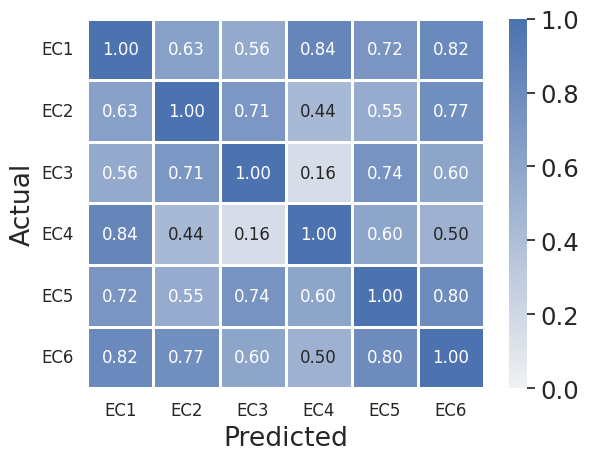

In [4]:
adj_ratio_mat, boundary_info = pairwise_boundary_analysis(model, dataset_list_pred)
draw_matrix(adj_ratio_mat, names=dataset.GRAPH_CLS.values(), fmt='.2f', labelsize=12, annotsize=12)

In [8]:
adjacent_classes = extract_adjacent_classes(adj_ratio_mat, threshold=0.8)
print(adjacent_classes)

# since our results differ, we take the adjacent classes from the original paper

adjacent_classes = [[0,3],[0,4],[0,5],[1,2],[3,4],[4,5]]
print(adjacent_classes)


[[0, 5], [0, 3]]
[[0, 3], [0, 4], [0, 5], [1, 2], [3, 4], [4, 5]]


## get results

In [11]:
results = get_results_2way(model=model, adjacent_classes=adjacent_classes, dataset_name=dataset_name, seeds=seeds, show_progress=True)

using seed 42


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 43


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 44


Processing...
Done!


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 45


Processing...
Done!


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 46


Processing...
Done!


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

In [12]:
results_formatted = dict()
for k, v in results.items():
    results_formatted[f"{k[0]},{k[1]}"] = v.tolist()

# saves results to file
with open(f"logs/{dataset_name}.json", 'w', encoding='utf-8') as f: 
    json.dump(results_formatted, f, ensure_ascii=False, indent=4)

# load results from file
with open(f"logs/{dataset_name}.json", 'r') as f:
    loaded = json.load(f)

results = dict()
for k,v in loaded.items():
    results[(k[0],k[2])] = np.array(v)

In [13]:
for k, v in results.items():
    print(f"c1 = {k[0]} c2 = {k[1]}")
    print(f'gnnboundary: c1_mean = {v[0]} c1_std = {v[1]} c2_mean = {v[2]} c2_std = {v[3]}')
    print(f'baseline: c1_mean = {v[4]} c1_std = {v[5]} c2_mean = {v[6]} c2_std = {v[7]}')

c1 = 0 c2 = 3
gnnboundary: c1_mean = 0.18833036547933868 c1_std = 0.03753665757322947 c2_mean = 0.2218114559141104 c2_std = 0.04658481696725594
baseline: c1_mean = 0.031466037243699965 c1_std = 0.1530412159503885 c2_mean = 0.0070984298464355725 c2_std = 0.0684902284998557
c1 = 0 c2 = 4
gnnboundary: c1_mean = 0.15147906120195404 c1_std = 0.02958134518293516 c2_mean = 0.444810444188118 c2_std = 0.0440322606148456
baseline: c1_mean = 0.02946975091864084 c1_std = 0.14352626196284657 c2_mean = 0.06993897429224377 c2_std = 0.242490910447747
c1 = 0 c2 = 5
gnnboundary: c1_mean = 0.28629591956213113 c1_std = 0.04841928109051704 c2_mean = 0.3075634080499411 c2_std = 0.028448400793863137
baseline: c1_mean = 0.027664451714829875 c1_std = 0.14154227133001582 c2_mean = 0.0400218176545145 c2_std = 0.17410454522214247
c1 = 1 c2 = 2
gnnboundary: c1_mean = 0.43381140537770946 c1_std = 0.04721778352348126 c2_mean = 0.5229774820875664 c2_std = 0.061707797596261764
baseline: c1_mean = 0.0907411349525015 c1

## 3way adjacent classes

In [5]:
adj_tensor, results = triplet_boundary_analysis(model, dataset_list_pred)
adjacent_triplets = find_top_triplets(adj_tensor, threshold=0.6)

Classes (0, 1, 5): Score 0.720 Classes (0, 4, 5): Score 0.710 Classes (0, 3, 4): Score 0.690 Classes (1, 4, 5): Score 0.630


In [6]:
adjacent_triplets_list = []
for triplet in adjacent_triplets:
    adjacent_triplets_list.append(list(triplet["classes"])) 

print(adjacent_triplets_list)

[[0, 1, 5], [0, 4, 5], [0, 3, 4], [1, 4, 5]]


## 3way results

In [19]:
results_3way = get_results_3way(model=model, adjacent_classes=adjacent_triplets_list, dataset_name=dataset_name, seeds=seeds, show_progress=True)

using seed 42


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 43


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 44


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 45


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 46


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

In [20]:
results_3way_formatted = dict()
for k, v in results_3way.items():
    results_3way_formatted[f"{k[0]},{k[1]},{k[2]}"] = v.tolist()

# saves results to file
with open(f"logs/{dataset_name}_3way.json", 'w', encoding='utf-8') as f: 
    json.dump(results_3way_formatted, f, ensure_ascii=False, indent=4)

# load results from file
with open(f"logs/{dataset_name}_3way.json", 'r') as f:
    loaded_3way = json.load(f)

results_3way = dict()
for k,v in loaded_3way.items():
    results_3way[(k[0],k[2],k[4])] = np.array(v)

In [21]:
for k, v in results_3way.items():
    print(f"c1 = {k[0]} c2 = {k[1]} c3 = {k[2]}")
    print(f'gnnboundary: c1_mean = {v[0]} c1_std = {v[1]} c2_mean = {v[2]} c2_std = {v[3]} c3_mean = {v[4]} c3_std = {v[5]}')
    print(f'baseline: c1_mean = {v[6]} c1_std = {v[7]} c2_mean = {v[8]} c2_std = {v[9]} c3_mean = {v[10]} c3_std = {v[11]}')
    print(f"convergence rate = {v[12]}")

c1 = 0 c2 = 4 c3 = 5
gnnboundary: c1_mean = 0.02952664082933441 c1_std = 0.01161779593658484 c2_mean = 0.322375302126212 c2_std = 0.012766797614106623 c3_mean = 0.3988040626952425 c3_std = 0.023994827218268608
baseline: c1_mean = 0.030338410933355247 c1_std = 0.15093421592932152 c2_mean = 0.06989463290891881 c2_std = 0.24245509468441842 c3_mean = 0.036176934696990626 c3_std = 0.16093519020565042
convergence rate = 0.0
c1 = 0 c2 = 1 c3 = 5
gnnboundary: c1_mean = 0.15201073134330514 c1_std = 0.020098387118388735 c2_mean = 0.21519848234733926 c2_std = 0.025096906609412564 c3_mean = 0.1556280465427786 c3_std = 0.0096596413832881
baseline: c1_mean = 0.02786453007389942 c1_std = 0.13946611955651614 c2_mean = 0.09267369821071304 c2_std = 0.26001501355590495 c3_mean = 0.041173441272241804 c3_std = 0.1735443217263554
convergence rate = 0.6000000000000001
c1 = 1 c2 = 4 c3 = 5
gnnboundary: c1_mean = 0.28873753023456566 c1_std = 0.01638682155890627 c2_mean = 0.22240692377500237 c2_std = 0.00457786

# Motif

In [16]:
dataset_name="motif"
dataset = MotifDataset(seed=12345)
model = GCNClassifier(node_features=len(dataset.NODE_CLS),
                      num_classes=len(dataset.GRAPH_CLS),
                      hidden_channels=6,
                      num_layers=3)
model.load_state_dict(torch.load('ckpts/motif.pt'))
dataset_list_gt = dataset.split_by_class()
dataset_list_pred = dataset.split_by_pred(model)
mean_embeds = [d.model_transform(model, key="embeds").mean(dim=0) for d in dataset_list_gt]

## adjacent classes

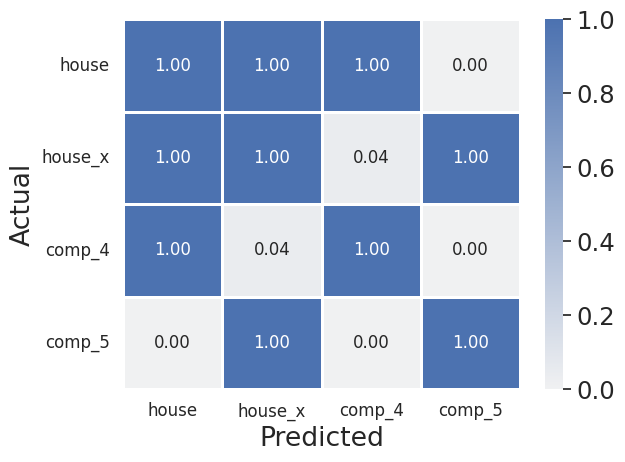

In [4]:
adj_ratio_mat, boundary_info = pairwise_boundary_analysis(model, dataset_list_pred)
draw_matrix(adj_ratio_mat, names=dataset.GRAPH_CLS.values(), fmt='.2f', labelsize=12, annotsize=12)

In [5]:
adjacent_classes = extract_adjacent_classes(adj_ratio_mat, threshold=0.8)
print(adjacent_classes)

[[0, 1], [0, 2], [1, 3]]


## get results

In [6]:
results = get_results_2way(model=model, adjacent_classes=adjacent_classes, dataset_name=dataset_name, seeds=seeds, show_progress=True)

using seed 42
using seed 43
using seed 44
using seed 45
using seed 46


In [8]:
results_formatted = dict()
for k, v in results.items():
    results_formatted[f"{k[0]},{k[1]}"] = v.tolist()

# saves results to file
with open(f"logs/{dataset_name}.json", 'w', encoding='utf-8') as f: 
    json.dump(results_formatted, f, ensure_ascii=False, indent=4)

# load results from file
with open(f"logs/{dataset_name}.json", 'r') as f:
    loaded = json.load(f)

results = dict()
for k,v in loaded.items():
    results[(k[0],k[2])] = np.array(v)

In [9]:
for k, v in results.items():
    print(f"c1 = {k[0]} c2 = {k[1]}")
    print(f'gnnboundary: c1_mean = {v[0]} c1_std = {v[1]} c2_mean = {v[2]} c2_std = {v[3]}')
    print(f'baseline: c1_mean = {v[4]} c1_std = {v[5]} c2_mean = {v[6]} c2_std = {v[7]}')

c1 = 0 c2 = 1
gnnboundary: c1_mean = 0.500856267915928 c1_std = 0.1651950462303402 c2_mean = 0.49790768722398204 c2_std = 0.16731927746959857
baseline: c1_mean = 0.7535550972908736 c1_std = 0.1493887981132927 c2_mean = 0.004452156612712133 c2_std = 0.01751561505208842
c1 = 0 c2 = 2
gnnboundary: c1_mean = 0.47649938561320304 c1_std = 0.05424783368869222 c2_mean = 0.522902509009838 c2_std = 0.054434780049904284
baseline: c1_mean = 0.7558131397202611 c1_std = 0.15088641848013012 c2_mean = 0.23972913449820177 c2_std = 0.15258156018448377
c1 = 1 c2 = 3
gnnboundary: c1_mean = 0.24247179028421928 c1_std = 0.054962440080945404 c2_mean = 0.3250777541598791 c2_std = 0.03317454808571049
baseline: c1_mean = 0.0034664536484974176 c1_std = 0.0034801980963396935 c2_mean = 2.998134929708713e-09 c2_std = 4.845143962002059e-09


## 3way adjacent classes

In [10]:
adj_tensor, results = triplet_boundary_analysis(model, dataset_list_pred)
adjacent_triplets = find_top_triplets(adj_tensor, threshold=0.9)

Classes (0, 1, 2): Score 1.000 Classes (0, 1, 3): Score 1.000


In [11]:
adjacent_triplets_list = []
for triplet in adjacent_triplets:
    adjacent_triplets_list.append(list(triplet["classes"])) 

print(adjacent_triplets_list)

[[0, 1, 2], [0, 1, 3]]


## 3way results

In [17]:
results_3way = get_results_3way(model=model, adjacent_classes=adjacent_triplets_list, dataset_name=dataset_name, seeds=seeds, show_progress=True)

using seed 42


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 43


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 44


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 45


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 46


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

In [18]:
results_3way_formatted = dict()
for k, v in results_3way.items():
    results_3way_formatted[f"{k[0]},{k[1]},{k[2]}"] = v.tolist()

# saves results to file
with open(f"logs/{dataset_name}_3way.json", 'w', encoding='utf-8') as f: 
    json.dump(results_3way_formatted, f, ensure_ascii=False, indent=4)

# load results from file
with open(f"logs/{dataset_name}_3way.json", 'r') as f:
    loaded_3way = json.load(f)

results_3way = dict()
for k,v in loaded_3way.items():
    results_3way[(k[0],k[2],k[4])] = np.array(v)

In [19]:
for k, v in results_3way.items():
    print(f"c1 = {k[0]} c2 = {k[1]} c3 = {k[2]}")
    print(f'gnnboundary: c1_mean = {v[0]} c1_std = {v[1]} c2_mean = {v[2]} c2_std = {v[3]} c3_mean = {v[4]} c3_std = {v[5]}')
    print(f'baseline: c1_mean = {v[6]} c1_std = {v[7]} c2_mean = {v[8]} c2_std = {v[9]} c3_mean = {v[10]} c3_std = {v[11]}')
    print(f"convergence rate = {v[12]}")

c1 = 0 c2 = 1 c3 = 2
gnnboundary: c1_mean = 0.7042905227929352 c1_std = 0.07654206515572753 c2_mean = 0.002582380066992482 c2_std = 0.0034032609477616096 c3_mean = 0.2931270973505685 c3_std = 0.07788407291150867
baseline: c1_mean = 0.7542917056798935 c1_std = 0.1469474794480979 c2_mean = 0.004038655160659982 c2_std = 0.01006387930568371 c3_mean = 0.24166963526380714 c3_std = 0.14955045644946802
convergence rate = 1.0
c1 = 0 c2 = 1 c3 = 3
gnnboundary: c1_mean = 0.1605105772137989 c1_std = 0.004475110089587449 c2_mean = 0.4267149240276872 c2_std = 0.030637640809515743 c3_mean = 0.41260585892617385 c3_std = 0.026138213998334308
baseline: c1_mean = 0.7638579308189453 c1_std = 0.14133051942392388 c2_mean = 0.004224326269569338 c2_std = 0.012587807793577915 c3_mean = 1.1012792994564058e-08 c3_std = 1.7299344500227446e-07
convergence rate = 1.0
